![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)

# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

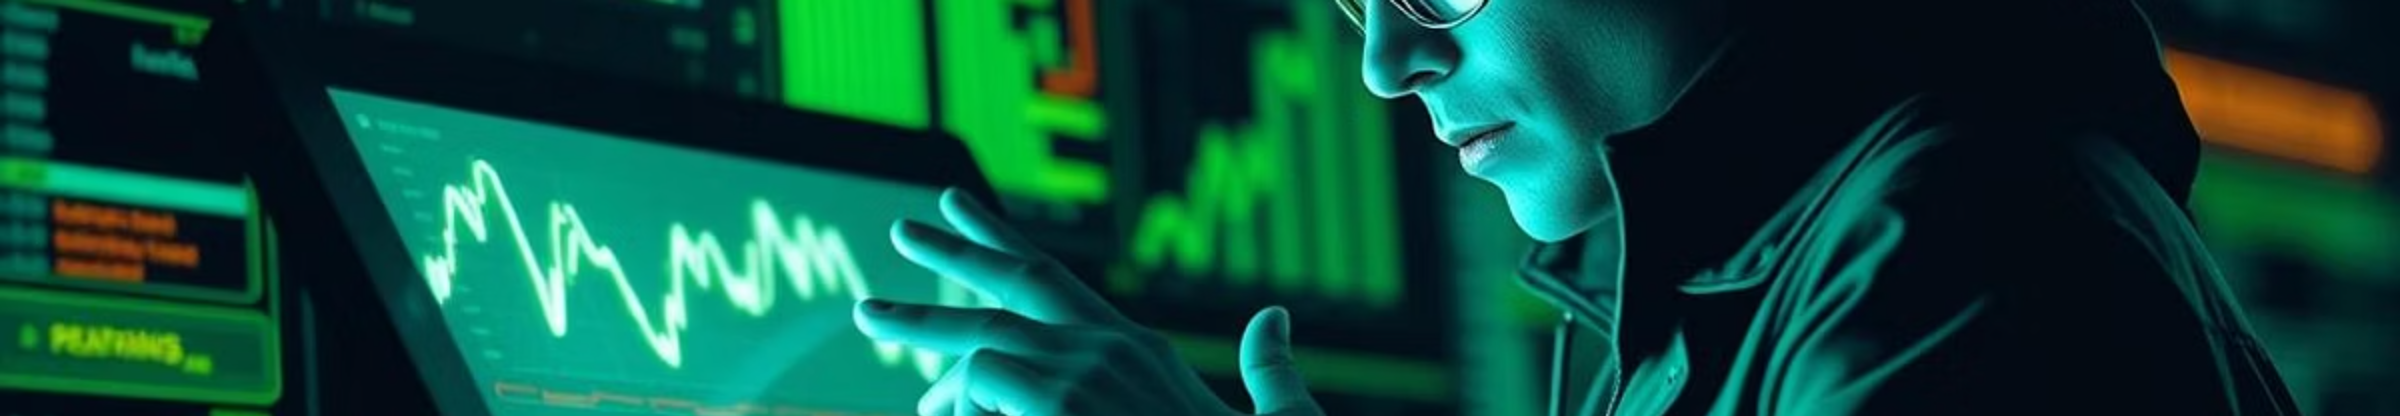

# **Tema 3: Algorìtmos de Clasificaciòn Bàsicos: K-Nearest Neighbors (KNN)**

## ¿**Qué es KNN y cómo funciona?**

El modelo **K-Nearest Neighbors (KNN)**, o **K-Vecinos Más Cercanos**, es uno de los algoritmos de aprendizaje automático supervisado más sencillos y, a la vez, potentes. Se utiliza tanto para problemas de clasificación como de regresión.

**Idea Principal:**

La idea fundamental detrás de KNN es que los puntos de datos similares tienden a estar cerca unos de otros. Imagina que tienes un nuevo punto de datos (una nueva "cosa" que quieres clasificar o predecir) y no sabes a qué categoría pertenece o qué valor tiene. KNN resuelve esto buscando los "k" puntos de datos más cercanos en tu conjunto de entrenamiento (datos que ya conoces y están etiquetados).

**¿Cómo funciona?**

1. **"K" es el número mágico:** Tú decides el valor de "K". Este es el número de vecinos más cercanos que el algoritmo considerará para tomar una decisión.

2. **Calcula distancias:** Para un nuevo punto de datos, el algoritmo calcula la distancia entre ese punto y todos los demás puntos en el conjunto de datos de entrenamiento. Las distancias más comunes son la **euclidiana**, **Manhattan**, etc.

3. **Encuentra los "K" más cercanos:** Una vez calculadas todas las distancias, el algoritmo identifica los "K" puntos de datos del conjunto de entrenamiento que están más cerca del nuevo punto.

4. **Toma de decisión:**

  + **Para clasificación:** El nuevo punto se asigna a la clase (categoría) que es más frecuente entre sus "K" vecinos más cercanos. Es como una "votación" de la mayoría.

  + **Para regresión:** El valor predicho para el nuevo punto es el promedio (o promedio ponderado) de los valores de sus "K" vecinos más cercanos.

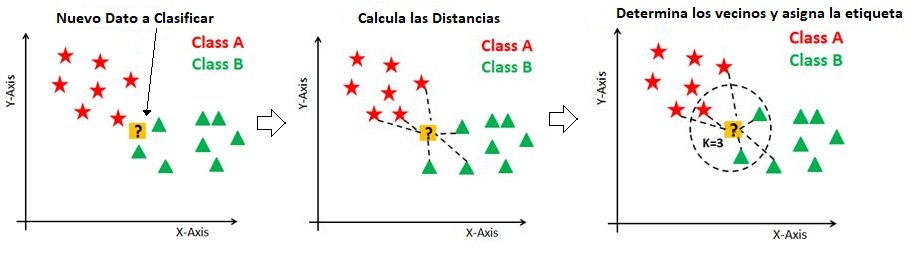

## **Ejemplo con Sklearn**

En este módulo, aplicaremos el algoritmo KNN a un dataset muy conocido en el mundo del Machine Learning: el dataset Iris. Este dataset contiene mediciones de diferentes especies de flores Iris.

## **Dataset Iris**

El dataset Iris consiste en 150 muestras de flores Iris, cada una con cuatro características:

+ **Sepal Length (Largo del Sépalo):** Longitud del sépalo en centímetros.
+ **Sepal Width (Ancho del Sépalo):** Ancho del sépalo en centímetros.
+ **Petal Length (Largo del Pétalo):** Longitud del pétalo en centímetros.
+ **Petal Width (Ancho del Pétalo):** Ancho del pétalo en centímetros.

Y tres clases (especies) de Iris:
+ **Setosa**
+ **Versicolor**
+ **Virginica**

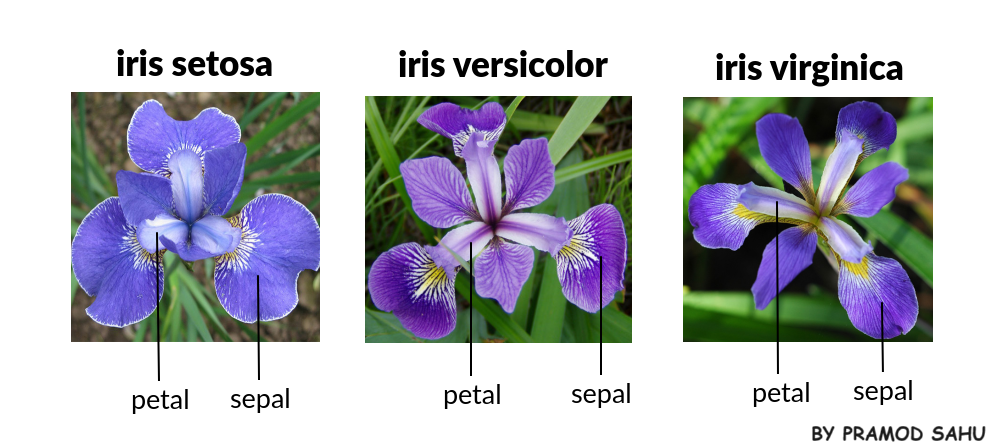

## **Importamos Librerías**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## **Cargamos el Dataset**

In [ ]:
iris = load_iris()
X = iris.data # Características
y = iris.target # Etiquetas (0: Setosa, 1: Versicolor, 2: Virginica)
feature_names = iris.feature_names
target_names = iris.target_names

print("Características (primeras 5 muestras):\n", X[:5])
print("\nEtiquetas (primeras 5 muestras):\n", y[:5])
print("\nNombres de las características:", feature_names)
print("\nNombres de las clases:", target_names)
print(f"\nForma de los datos X: {X.shape}")
print(f"Forma de los datos y: {y.shape}")

Características (primeras 5 muestras):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Etiquetas (primeras 5 muestras):
 [0 0 0 0 0]

Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Nombres de las clases: ['setosa' 'versicolor' 'virginica']

Forma de los datos X: (150, 4)
Forma de los datos y: (150,)


In [ ]:
# Crear un DataFrame para facilitar la visualización con seaborn
import pandas as pd
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = y
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## **Estadísticas Descriptivas**

In [ ]:
print("Estadísticas Descriptivas del Dataset Iris:")
print(iris_df.describe())

Estadísticas Descriptivas del Dataset Iris:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


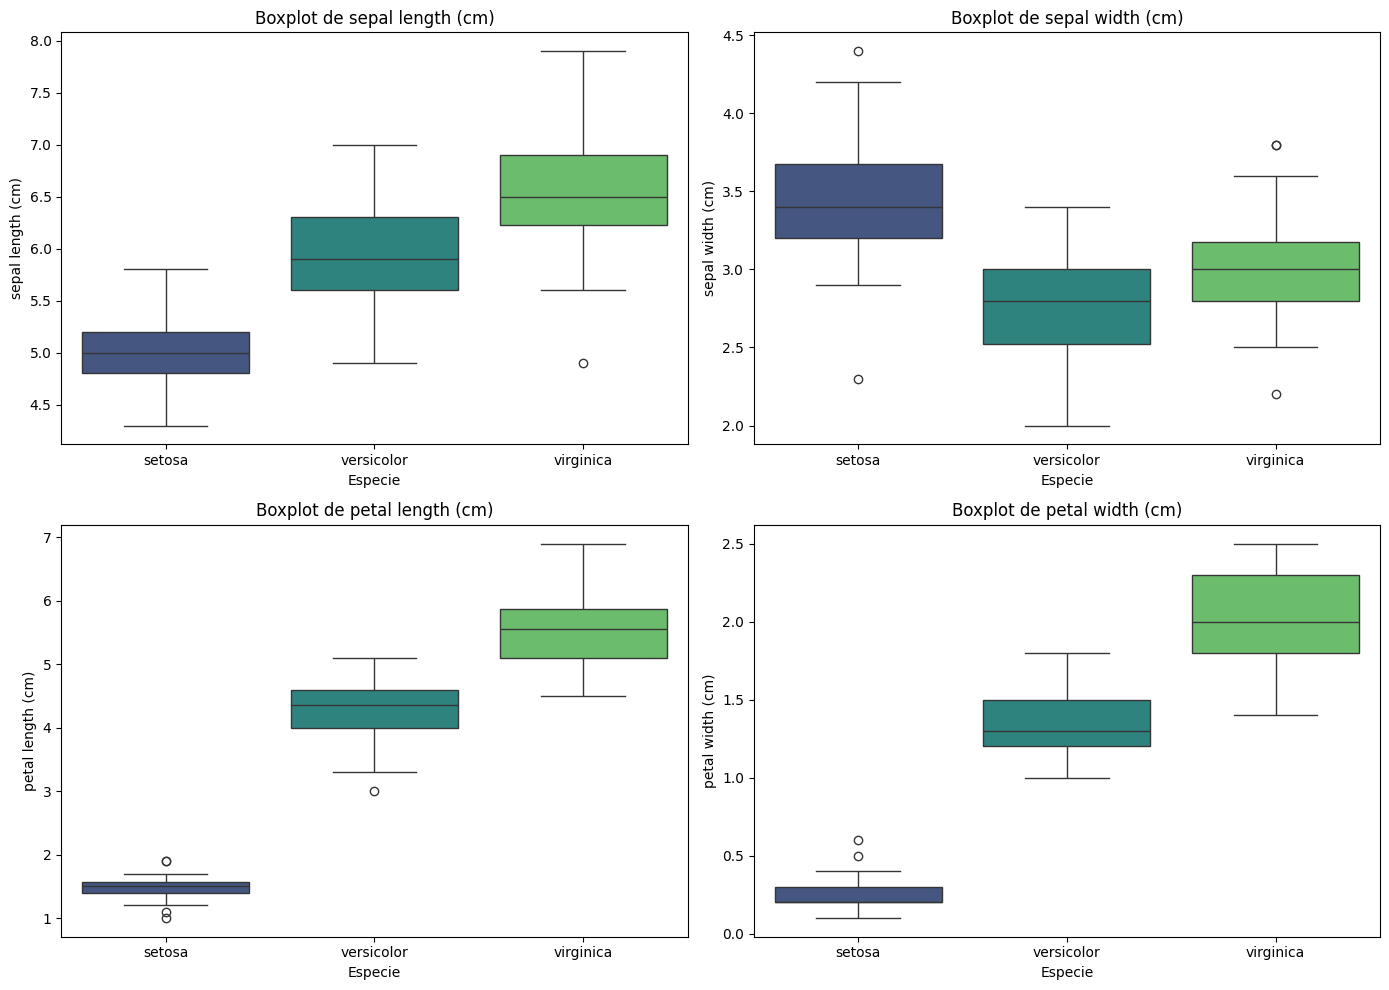

In [ ]:
# Crear boxplots para cada característica, separando por especie
plt.figure(figsize=(14, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1) # Crea una cuadrícula de 2x2
    sns.boxplot(x='species', y=feature, data=iris_df, hue='species', palette='viridis')
    plt.title(f'Boxplot de {feature}')
    plt.xlabel('Especie')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## **Visualización de Pares de Características**

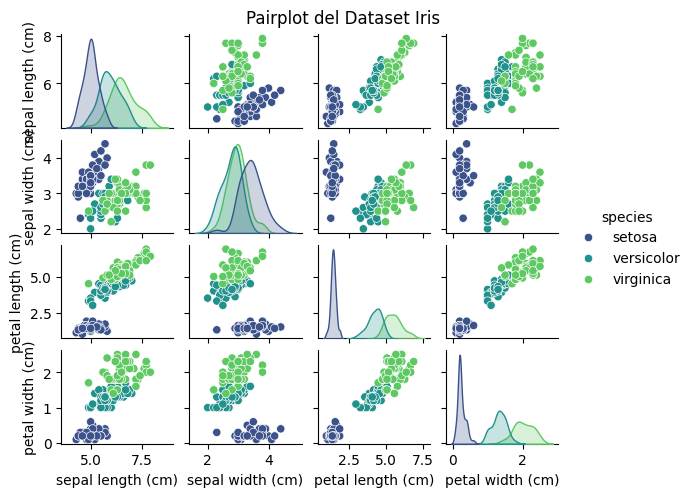

In [ ]:
# Usar seaborn para crear un pairplot
# Esto nos muestra la distribución de cada característica y las relaciones entre pares
subplot_height = 1.2 # Cada subplot tendrá 3 pulgadas de alto
aspect_ratio = 1.2 # Cada subplot será 1.2 veces más ancho que alto
sns.pairplot(iris_df, hue='species', palette='viridis', height=subplot_height, aspect=aspect_ratio)
plt.suptitle('Pairplot del Dataset Iris', y=1.02) # Ajustar título para que no se solape
plt.show()

+ Observa cómo la clase 'setosa' (generalmente en azul en el pairplot) es muy separable de las otras dos clases basándose en el largo y ancho del pétalo.
+ Las clases 'versicolor' y 'virginica' se superponen un poco más, especialmente en las características del sépalo.

## **Dividir los Datos en Conjuntos de Entrenamiento y Prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Usamos stratify=y para asegurar que la proporción de clases sea la misma en ambos conjuntos

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


## **Escalar los datos**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Crear y Entrenar un Modelo**


In [ ]:
# Crear el clasificador KNN con k=5
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn_classifier.fit(X_train_scaled, y_train)

print(f"Modelo KNN entrenado con k = {k}")

Modelo KNN entrenado con k = 5


## **Realizar Predicciones**

In [ ]:
y_pred = knn_classifier.predict(X_test_scaled)

## **Evaluar el Modelo**

Precisión del modelo KNN (k=5): 0.91

Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



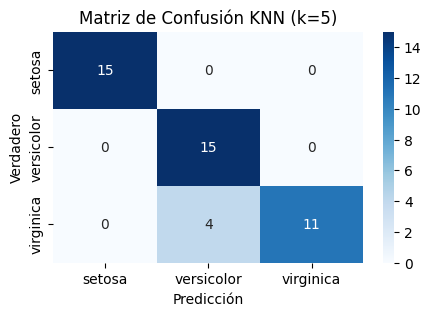

In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN (k={k}): {accuracy:.2f}")

# Mostrar un informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Mostrar la matriz de confusión
# print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
# print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión KNN (k={k})')
plt.show()

## **Fronteras ed Decisión**

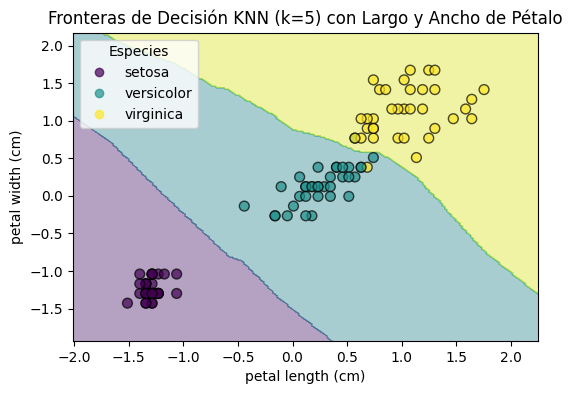

In [ ]:
# @title
# Seleccionar solo dos características para la visualización
# Largo del pétalo es el índice 2, Ancho del pétalo es el índice 3
feature_index_1 = 2 # Petal Length
feature_index_2 = 3 # Petal Width

X_train_viz = X_train_scaled[:, [feature_index_1, feature_index_2]]
X_test_viz = X_test_scaled[:, [feature_index_1, feature_index_2]]

# Re-entrenar el clasificador solo con estas dos características
knn_classifier_viz = KNeighborsClassifier(n_neighbors=k)
knn_classifier_viz.fit(X_train_viz, y_train)

# Función para graficar las fronteras de decisión (adaptada para 2 características)
def plot_decision_boundary_2d(X_train_data, y_train_data, classifier, title, feature_names_pair):
    h = .02  # Paso del mesh
    x_min, x_max = X_train_data[:, 0].min() - 0.5, X_train_data[:, 0].max() + 0.5
    y_min, y_max = X_train_data[:, 1].min() - 0.5, X_train_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir para cada punto del mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.viridis)

    # Graficar los puntos de entrenamiento
    scatter = plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data, cmap=plt.cm.viridis, edgecolor='k', s=50, alpha=0.7)
    plt.xlabel(feature_names_pair[0])
    plt.ylabel(feature_names_pair[1])
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Añadir leyenda
    legend_labels = target_names
    handles, _ = scatter.legend_elements()
    plt.legend(handles, legend_labels, title="Especies")
    plt.show()

# Nombres de las características seleccionadas para la visualización
selected_features = [feature_names[feature_index_1], feature_names[feature_index_2]]

plot_decision_boundary_2d(X_train_viz, y_train, knn_classifier_viz, f'Fronteras de Decisión KNN (k={k}) con Largo y Ancho de Pétalo', selected_features)

## **Predicción de una nueva Flor**

In [ ]:
# Orden: Sepal Length, Sepal Width, Petal Length, Petal Width
nueva_flor_iris = np.array([[5.5, 3.0, 4.0, 1.2]])

# Escalar la nueva flor usando el mismo scaler
nueva_flor_iris_scaled = scaler.transform(nueva_flor_iris)

# Realizar la predicción
prediccion_nueva_flor_iris = knn_classifier.predict(nueva_flor_iris_scaled)

# Interpretar la predicción
especie_predicha = target_names[prediccion_nueva_flor_iris[0]]
print(f"Las mediciones de la nueva flor son: {nueva_flor_iris[0]}")
print(f"La nueva flor Iris es predicha como: {especie_predicha}")


Las mediciones de la nueva flor son: [5.5 3.  4.  1.2]
La nueva flor Iris es predicha como: versicolor


## **Experimentando con Diferentes Valores de 'k'**

Precisión con k = 1: 0.93
Precisión con k = 3: 0.91
Precisión con k = 5: 0.91
Precisión con k = 7: 0.93
Precisión con k = 9: 0.96
Precisión con k = 11: 0.96


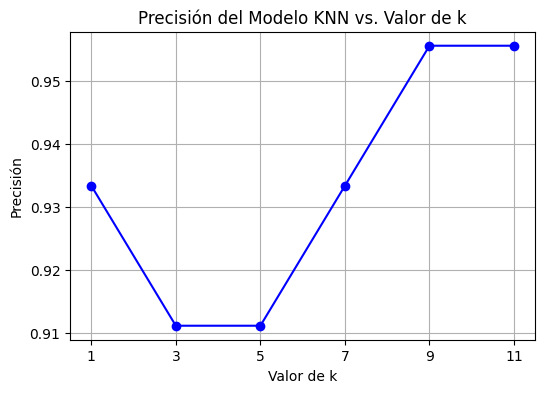

In [ ]:
# Probar con diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []

for k_val in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracies.append(accuracy)
    print(f"Precisión con k = {k_val}: {accuracy:.2f}")

# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del Modelo KNN vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## **Validación Cruzada**

La **validación cruzada** es una técnica fundamental en el aprendizaje automático para evaluar la capacidad de generalización de un modelo y para la selección de hiperparámetros. Su objetivo principal es obtener una estimación más fiable del rendimiento de un modelo en datos que no ha visto durante el entrenamiento, reduciendo la dependencia de una única división de datos.

**El Problema que Resuelve:**

Al entrenar un modelo y evaluarlo en un único conjunto de prueba, el rendimiento medido puede ser sesgado. Si la división entrenamiento/prueba es particularmente favorable o desfavorable para un modelo o un conjunto de hiperparámetros, la evaluación resultante podría no reflejar el rendimiento real del modelo en datos completamente nuevos.

**Proceso General (Ejemplo: k-Fold Cross-Validation):**
1. **División en Particiones:** El conjunto de datos de entrenamiento se divide aleatoriamente en k particiones de tamaño aproximadamente igual.

2. **Iteraciones:** Se realizan k iteraciones. En cada iteración i (donde i va de 1 a k):
 + La particion i se utiliza como conjunto de validación.
 + Las k-1 particiones restantes se combinan para formar el conjunto de entrenamiento.
 + El modelo se entrena con el conjunto de entrenamiento y se evalúa en el conjunto de validación.

3. **Agregación de Resultados:** Las métricas de rendimiento obtenidas en cada una de las k iteraciones se promedian. Este promedio proporciona una estimación más robusta del rendimiento del modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
k_values = range(1, 12, 2) # Probar k de 1 a 11 (impares)
accuracies_cv = []

for k_val in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracies_cv.append(scores.mean()) # Guardar la media de las puntuaciones de CV

# Ahora comparas las accuracies_cv para encontrar el mejor k
best_k_cv = k_values[np.argmax(accuracies_cv)]
print(f"Mejor k (con CV en el conjunto de entrenamiento): {best_k_cv}")

Mejor k (con CV en el conjunto de entrenamiento): 7
